<a href="https://colab.research.google.com/github/walnashgit/S22UNET-VAE/blob/main/UNET/S22_UNET_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/walnashgit/S22UNET-VAE.git

Cloning into 'S22UNET-VAE'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 40 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (40/40), 582.48 KiB | 631.00 KiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
%cd /content/S22UNET-VAE/UNET

/content/S22UNET-VAE/UNET


In [ ]:
!pip install torch-lr-finder
!pip install torchsummary
!pip install pytorch-lightning

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

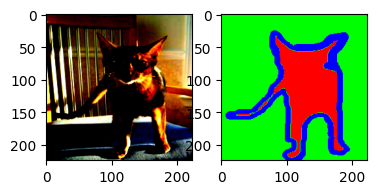

In [ ]:
from OxfordIIITPetDataset import *
from utils import plot_prediction_sample

train_data, test_data = get_dataset()

plot_prediction_sample(test_data[2][0], test_data[2][1], None)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


##-- MP+Tr+BCELoss --##


/usr/local/lib/python3.10/dist-packages/lightning_fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
  ContractingBlock-8  [[-1, 64, 112, 112], [-1, 64, 224, 224]]               0
            Conv2d-9        [-1, 128, 112, 112]          73,856
      BatchNorm2d-10        [-1, 128, 112, 112]             256
             ReLU-11        [-1, 128, 112, 112]               0
           Conv2d-12        [-1, 128, 112, 112]         147,584
      BatchNorm2d-13        [-1, 128, 112, 112]             256
             ReLU-14    

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.40E-03


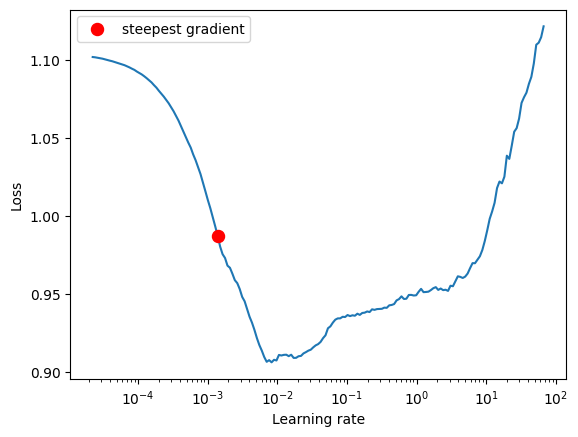

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
INFO:pytorch_lightning.callbacks.model_summary:
  | Name        | Type             | Params | Mode 
---------------------------------------------------------
0 | contract1   | ContractingBlock | 39.0 K | train
1 | contract2   | ContractingBlock | 221 K  | train
2 | contract3   | ContractingBlock | 886 K  | train
3 | bottleneck  | ContractingBlock | 3.5 M  | train
4 | bottleneck2 | ExpandingBlock   | 1.8 M  | train
5 | expand1     | ExpandingBlock   | 1.9 M  | train
6 | expand2     | ExpandingBlock   | 475 K  | train
7 | expand3     | ExpandingBlock   | 119 K  | train
8 | final_conv  | Conv2d           | 99     | train
---------------------------------------------------------
9.0 M     Trainable params
0         Non-trainable params
9

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  0
Train Loss:  1.0766303539276123
Val Loss:  1.0235681533813477


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  1


Train Loss:  0.9047068953514099
Val Loss:  0.8659044504165649


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  2


Train Loss:  0.7740962505340576
Val Loss:  0.8145338892936707


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  3


Train Loss:  0.7567423582077026
Val Loss:  0.8121598362922668


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  4


Train Loss:  0.7601309418678284
Val Loss:  0.8116175532341003


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  5


Train Loss:  0.7429320812225342
Val Loss:  0.8038228154182434


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  6


Train Loss:  0.7348982095718384
Val Loss:  0.7408542037010193


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  7


Train Loss:  0.7201544642448425
Val Loss:  0.7304370403289795


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  8


Train Loss:  0.7077241539955139
Val Loss:  0.7349544763565063


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  9


Train Loss:  0.6922926306724548
Val Loss:  0.7194249629974365


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  10


Train Loss:  0.6801703572273254
Val Loss:  0.683778703212738


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  11


Train Loss:  0.6692897081375122
Val Loss:  0.6707422137260437


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


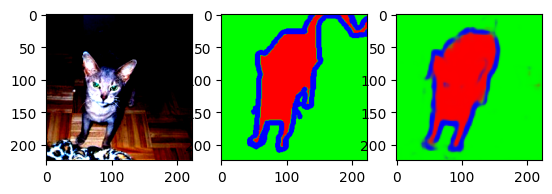

In [ ]:
from main import init, unet_config
from loss import bce_loss

cfg = unet_config
cfg['num_epochs'] = 12

batch_size = 64
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

train_dataloader, test_dataloader = get_dataloader(**kwargs)

print('##-- MP+Tr+BCELoss --##')
model = init(train_dataloader,
             test_dataloader,
             cfg=unet_config,
             in_channels=3,
             out_channels=3,
             show_summary=True,
            #  max_lr=10e-3,
             loss_fn=bce_loss,
             upsample='transpose_conv',
             downsample='maxpool',
             accelerator='cuda')

Shape of input tensor x : torch.Size([3, 224, 224])


pred shape torch.Size([1, 3, 224, 224])


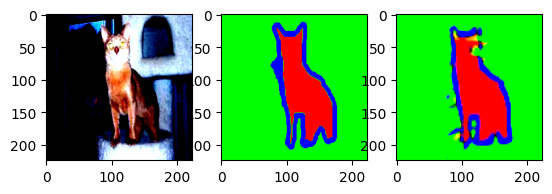

In [ ]:
from utils import plot_prediction_sample
model.eval()

x, y = test_data[1][0], test_data[1][1]
print("Shape of input tensor x :", x.shape)
pred = model(x.unsqueeze(0))
print("pred shape", pred.shape)

plot_prediction_sample(x, y, pred[0].detach())

##-- MP+Tr+Dice Loss --##


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/lightning_fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
  ContractingBlock-8  [[-1, 64, 112, 112], [-1, 64, 224, 224]]               0
            Conv2d-9        [-1, 128, 112, 112]          73,856
      BatchNorm2d-10        [-1, 128, 112, 112]             256
             ReLU-11        [-1, 128, 112, 112]               0
           Conv2d-12        [-1, 128, 112, 112]         147,584
      BatchNorm2d-13        [-1, 128, 112, 112]             256
             ReLU-14    

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.19E-03


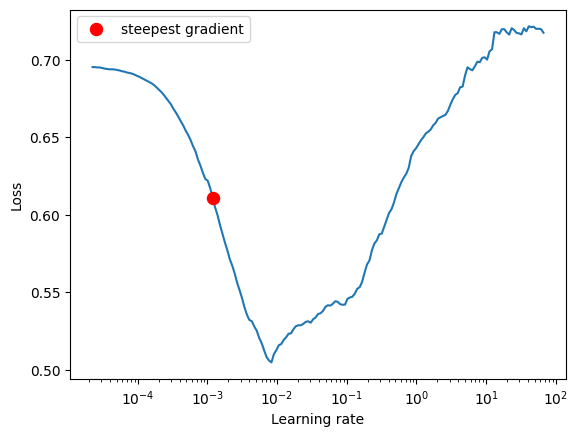

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
INFO:pytorch_lightning.callbacks.model_summary:
  | Name        | Type             | Params | Mode 
---------------------------------------------------------
0 | contract1   | ContractingBlock | 39.0 K | train
1 | contract2   | ContractingBlock | 221 K  | train
2 | contract3   | ContractingBlock | 886 K  | train
3 | bottleneck  | ContractingBlock | 3.5 M  | train
4 | bottleneck2 | ExpandingBlock   | 1.8 M  | train
5 | expand1     | ExpandingBlock   | 1.9 M  | train
6 | expand2     | ExpandingBlock   | 475 K  | train
7 | expand3     | ExpandingBlock   | 119 K  | train
8 | final_conv  | Conv2d           | 99     | train
---------------------------------------------------------
9.0 M     Trainable params
0         Non-trainable params
9

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  0
Train Loss:  0.680275559425354
Val Loss:  0.6017872095108032


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  1
Train Loss:  0.530442476272583
Val Loss:  0.544853150844574


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  2
Train Loss:  0.34367209672927856
Val Loss:  0.33035334944725037


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  3
Train Loss:  0.29023730754852295
Val Loss:  0.28045573830604553


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  4
Train Loss:  0.27327606081962585
Val Loss:  0.3218078017234802


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  5
Train Loss:  0.2654651403427124
Val Loss:  0.31233417987823486


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  6
Train Loss:  0.24284625053405762
Val Loss:  0.24661841988563538


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  7
Train Loss:  0.23335616290569305
Val Loss:  0.25278499722480774


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  8
Train Loss:  0.2195231020450592
Val Loss:  0.21179842948913574


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  9
Train Loss:  0.20211496949195862
Val Loss:  0.19736754894256592


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  10
Train Loss:  0.18765655159950256
Val Loss:  0.18833962082862854


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch  11
Train Loss:  0.17478609085083008
Val Loss:  0.16988983750343323


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


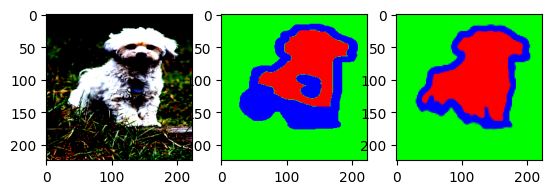

In [ ]:
from loss import dice_loss
from main import init, unet_config
from OxfordIIITPetDataset import *
import torch
torch.cuda.empty_cache()

print('##-- MP+Tr+Dice Loss --##')
cfg = unet_config
cfg['num_epochs'] = 12

batch_size = 64
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

train_dataloader, test_dataloader = get_dataloader(**kwargs)

model2 = init(train_dataloader,
             test_dataloader,
             cfg=cfg,
             in_channels=3,
             out_channels=3,
             show_summary=True,
             # max_lr=10e-3,
             loss_fn=dice_loss,
             upsample='transpose_conv',
             downsample='maxpool',
             accelerator='cuda')

Shape of input tensor x : torch.Size([3, 224, 224])


pred shape torch.Size([1, 3, 224, 224])


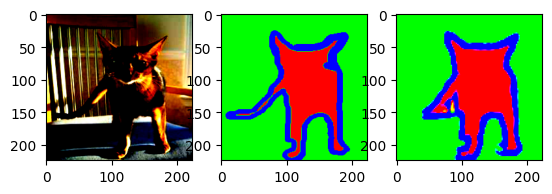

In [ ]:
from utils import plot_prediction_sample
model2.eval()

x, y = test_data[2][0], test_data[2][1]
print("Shape of input tensor x :", x.shape)
pred = model2(x.unsqueeze(0))
print("pred shape", pred.shape)

plot_prediction_sample(x, y, pred[0].detach())